In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import log, exp

$S=susceptible, I=Infected and infectious, R=Infected but not infectious, D=dead, C= Recovered and immune, N = population$
$$ \begin{align}
\Delta S_{t+1} &= - \beta \frac{S_t I_t}{N} 
\\
\Delta I_{t+1} &= \beta \frac{S_t I_t}{N} - \gamma I_t
\\
\Delta R_{t+1} &= \gamma I_t - \theta R_t  
\\
\Delta D_{t+1} &= \delta \theta R_t 
\\
\Delta C_{t+1} &= (1-\delta) \theta R_t 
\end{align} $$

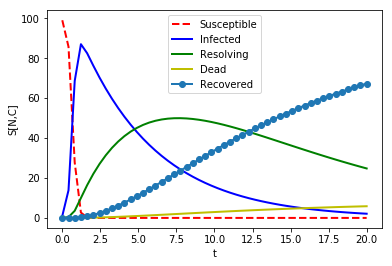

In [78]:
def g(s,t):
    g = 0.2
    b = 7
    N = 100 
    theta = 0.1
    delta = 0.08
    S = s[0]
    I = s[1]
    R = s[2]
    D = s[3]
    C = s[4]
    dSdt = - b*S*I/N 
    dIdt = b*S*I/N - g*I
    dRdt = g*I - theta*R
    dDdt = delta*theta*R 
    dCdt = (1-delta)*theta*R
    return [dSdt, dIdt,dRdt,dDdt,dCdt]

#Graph x axis
t = np.linspace(0,20)
#Vector for initial conditions of each equation
s0=[99,1,0,0,0]
#Ordinary differential equation
s = odeint(g,s0,t)

plt.plot(t,s[:,0],'r--', linewidth=2.0)
plt.plot(t,s[:,1],'b-', linewidth=2.0)
plt.plot(t,s[:,2],'g-', linewidth=2.0)
plt.plot(t,s[:,3],'y-', linewidth=2.0)
plt.plot(t,s[:,4],'o-', linewidth=2.0)
plt.xlabel("t")
plt.ylabel("S[N,C]")
plt.legend(["Susceptible","Infected","Resolving","Dead","Recovered"])
plt.show()

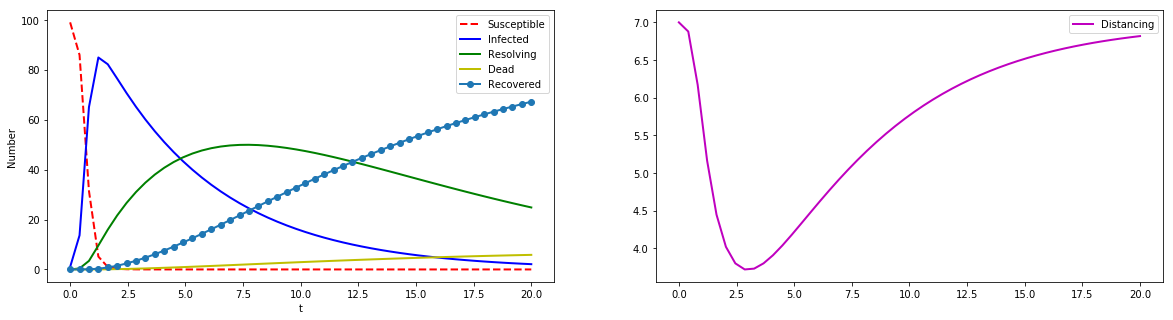

In [30]:
beta = 7
def g(s,t):
    g = 0.2
    k = 1
    N = 100 
    theta = 0.1
    delta = 0.08
    S = s[0]
    I = s[1]
    R = s[2]
    D = s[3]
    C = s[4]
    #Current value of beta
    b = s[5]
    #New Value of beta
    newbeta = exp(log(beta)-k*I/N)
    #New difference
    dbdt = newbeta - b
    dSdt = - b*S*I/N 
    dIdt = b*S*I/N - g*I
    dRdt = g*I - theta*R
    dDdt = delta*theta*R 
    dCdt = (1-delta)*theta*R
    return [dSdt, dIdt,dRdt,dDdt,dCdt,dbdt]

#Graph x axis
t = np.linspace(0,20)
#Vector for initial conditions of each equation
s0=[99,1,0,0,0,beta]
#Ordinary differential equation
s = odeint(g,s0,t)


f = plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.plot(t,s[:,0],'r--', linewidth=2.0)
plt.plot(t,s[:,1],'b-', linewidth=2.0)
plt.plot(t,s[:,2],'g-', linewidth=2.0)
plt.plot(t,s[:,3],'y-', linewidth=2.0)
plt.plot(t,s[:,4],'o-', linewidth=2.0)
plt.xlabel("t")
plt.ylabel("Number")
plt.legend(["Susceptible","Infected","Resolving","Dead","Recovered"])

plt.subplot(1, 2, 2)
plt.plot(t,s[:,5],'m-', linewidth=2.0)
plt.legend(["Distancing"])

plt.savefig('simple.png', dpi=1000)
plt.show()

In [ ]:
https://johnhcochrane.blogspot.com/